In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
data1 = pd.DataFrame({"C" : np.random.randint(low=1, high=100, size=10),
                     "D"  : np.random.normal(0.0, 1.0, size=10)
                      
                     
                     })

In [2]:
data1.head(10)

,C,D
0,38,-0.528172
1,13,-1.072969
2,73,0.865408
3,10,-2.301539
4,76,1.744812
5,6,-0.761207
6,80,0.319039
7,65,-0.249370
8,17,1.462108
9,2,-2.060141


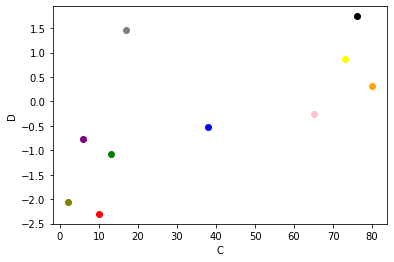

In [3]:
color=['blue','green','yellow',"red","black","purple","orange","pink","gray","olive"]
for index,row in data1.iterrows():
    plt.scatter(row["C"],row["D"],c=color[index])
plt.xlabel('C')
plt.ylabel('D')
plt.show()

In [4]:
data=data1
from scipy.spatial import distance
a2=["C","D"]
K=3
while(len(data.index)>K):
    dic={}
   
    for index1,row_c in data.iterrows():
        for index2,row_d in data.iterrows():
            d=distance.euclidean(row_c[a2],row_d[a2])
            if index1!=index2:
                dic[index1,index2]=[d]
    sorted_dic = sorted(dic.items(), key=lambda x: x[1]) 
    sorted_dic=dict(sorted_dic)
    temp = []
    res = dict()
    for key, val in sorted_dic.items():
        if val not in temp:
            temp.append(val)
            res[key] = val
    key_list = list(res.keys())
    a=key_list[0]
    result = data.iloc[[a[0],a[1]]]  
    a1=result.mean(axis=0)
    data=data.drop([a[0],a[1]],axis=0)
    data.reset_index(inplace = True)
    data=data.drop(["index"], axis=1)
    data.loc[len(data.index)] = [a1[0],a1[1]]

In [5]:
i=1
for ind,rww in data.iterrows():
    ED=[]
    for ind1,rww1 in data1.iterrows():
        d1=distance.euclidean(rww[a2],rww1[a2])
        ED.append(d1)
    data1[i]=ED
    i=i+1
C=[]
for index,row in data1.iterrows():
    min_dist=row[1]
    pos=1
    for i in range(data.shape[0]):
        if row[i+1] < min_dist:
            min_dist = row[i+1]
            pos=i+1
    C.append(pos)
data1["Cluster"]=C
data1.head(10)

,C,D,1,2,3,Cluster
0,38,-0.528172,0.000000,28.875944,33.134890,1
1,13,-1.072969,25.005935,3.887488,58.140776,2
2,73,0.865408,35.027733,63.895719,1.963860,3
3,10,-2.301539,28.056101,1.771148,61.179547,2
4,76,1.744812,38.067919,66.921953,5.089925,3
5,6,-0.761207,32.000849,3.125000,65.133344,2
6,80,0.319039,42.008544,70.883238,8.875080,3
7,65,-0.249370,27.001439,55.877348,6.147950,3
8,17,1.462108,21.094104,8.182946,54.137878,2
9,2,-2.060141,36.032581,7.242360,69.164646,2


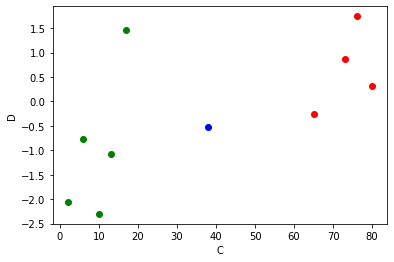

In [6]:
color=['blue','green','red',"yellow","olive"]
for k in range(len(color)):
    data2=data1[data1["Cluster"]==k+1]
    plt.scatter(data2["C"],data2["D"],c=color[k])

plt.xlabel('C')
plt.ylabel('D')
plt.show()